In [34]:
%matplotlib inline
import pandas as pd
import numpy as np
import datetime
from fbprophet import Prophet

In [35]:
df = pd.read_csv('sms_usage.csv',parse_dates=True)
df.tail()

,Date,Usage
835,2018-04-14,55897
836,2018-04-15,40892
837,2018-04-16,66625
838,2018-04-17,45260
839,2018-04-18,37927


In [36]:
df.columns = ['ds', 'y']

In [37]:
model = Prophet(daily_seasonality=True,changepoint_prior_scale=0.15,yearly_seasonality=False)

In [39]:
model.fit(df)

/home/multiplexer/anaconda3/envs/py3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [40]:
model.set_auto_seasonalities()

INFO:fbprophet.forecaster:Found custom seasonality named "weekly", disabling built-in weekly seasonality.


In [41]:
future = model.make_future_dataframe(periods=30,freq='D')

In [42]:
forecast = model.predict(future)

In [51]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend','OLD']].head()

,ds,yhat,yhat_lower,yhat_upper,trend,OLD
0,2016-01-01,39630.768050,-19355.082733,100417.396513,45840.711411,47139.0
1,2016-01-02,48018.097648,-11343.589670,110190.685407,45906.981207,85312.0
2,2016-01-03,25631.024399,-36213.665612,87827.240487,45973.251003,14301.0
3,2016-01-04,34570.274262,-26897.341475,96976.152585,46039.520799,20510.0
4,2016-01-05,50298.293699,-13296.045877,111759.534940,46105.790594,24225.0


In [44]:
forecast['OLD'] = df['y']

In [57]:
# forecast['predicted'] = (forecast['yhat_upper']-forecast['yhat']-forecast['yhat_lower'])
forecast['predicted'] = ((forecast['yhat_upper']-forecast['trend'])-forecast['yhat_lower'])
forecast.describe()

,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,daily,daily_lower,daily_upper,seasonal,seasonal_lower,seasonal_upper,seasonalities,seasonalities_lower,seasonalities_upper,weekly,weekly_lower,weekly_upper,yhat,OLD,predicted
count,870.000000,870.000000,870.000000,870.000000,870.000000,8.700000e+02,8.700000e+02,8.700000e+02,870.000000,870.000000,870.000000,870.000000,870.000000,870.000000,870.000000,870.000000,870.000000,870.000000,840.000000,870.000000
mean,68034.548446,68033.936920,68035.221111,2580.559089,123159.387494,-5.069853e+03,-5.069853e+03,-5.069853e+03,-5062.908990,-5062.908990,-5062.908990,-5062.908990,-5062.908990,-5062.908990,6.943538,6.943538,6.943538,62971.639456,62745.089286,52544.279959
std,9783.244151,9782.856683,9783.672931,12862.568998,12868.757801,1.820036e-12,1.820036e-12,1.820036e-12,7873.455855,7873.455855,7873.455855,7873.455855,7873.455855,7873.455855,7873.455855,7873.455855,7873.455855,12573.311002,48849.474507,10326.796094
min,45840.711411,45840.711411,45840.711411,-37776.284567,84736.035005,-5.069853e+03,-5.069853e+03,-5.069853e+03,-20342.226603,-20342.226603,-20342.226603,-20342.226603,-20342.226603,-20342.226603,-15272.374075,-15272.374075,-15272.374075,25631.024399,2737.000000,35623.349243
25%,60250.173751,60250.173751,60250.173751,-6604.054894,114103.527120,-5.069853e+03,-5.069853e+03,-5.069853e+03,-11469.246537,-11469.246537,-11469.246537,-11469.246537,-11469.246537,-11469.246537,-6399.394009,-6399.394009,-6399.394009,54496.808807,36651.750000,44580.913313
50%,74270.475770,74246.691912,74293.053239,4408.825960,125391.316296,-5.069853e+03,-5.069853e+03,-5.069853e+03,-2548.516616,-2548.516616,-2548.516616,-2548.516616,-2548.516616,-2548.516616,2521.335912,2521.335912,2521.335912,64700.419616,52852.500000,48785.229368
75%,75800.435712,75800.435712,75800.435712,13058.428047,133836.409045,-5.069853e+03,-5.069853e+03,-5.069853e+03,2111.116441,2111.116441,2111.116441,2111.116441,2111.116441,2111.116441,7180.968969,7180.968969,7180.968969,73628.663118,74907.750000,60359.941927
max,77219.673922,77219.673922,77219.673922,26573.447875,146584.176373,-5.069853e+03,-5.069853e+03,-5.069853e+03,4192.503105,4192.503105,4192.503105,4192.503105,4192.503105,4192.503105,9262.355633,9262.355633,9262.355633,81388.555218,645130.000000,80990.159074


In [58]:
print(forecast.columns)
forecast['OLD'].corr(forecast['predicted'])

Index(['ds', 'trend', 'trend_lower', 'trend_upper', 'yhat_lower', 'yhat_upper',
       'daily', 'daily_lower', 'daily_upper', 'seasonal', 'seasonal_lower',
       'seasonal_upper', 'seasonalities', 'seasonalities_lower',
       'seasonalities_upper', 'weekly', 'weekly_lower', 'weekly_upper', 'yhat',
       'OLD', 'predicted'],
      dtype='object')


-0.2046565256946557

In [60]:
forecast.to_csv('sms_predicted.csv')
forecast.tail(40)

,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,daily,daily_lower,daily_upper,seasonal,...,seasonal_upper,seasonalities,seasonalities_lower,seasonalities_upper,weekly,weekly_lower,weekly_upper,yhat,OLD,predicted
830,2018-04-09,74503.311227,74503.311227,74503.311227,3277.807370,123069.199636,-5069.852528,-5069.852528,-5069.852528,-11469.246537,...,-11469.246537,-11469.246537,-11469.246537,-11469.246537,-6399.394009,-6399.394009,-6399.394009,63034.064690,78592.0,45288.081039
831,2018-04-10,74495.437940,74495.437940,74495.437940,14248.256017,135983.717860,-5069.852528,-5069.852528,-5069.852528,4192.503105,...,4192.503105,4192.503105,4192.503105,4192.503105,9262.355633,9262.355633,9262.355633,78687.941045,73999.0,47240.023904
832,2018-04-11,74487.564653,74487.564653,74487.564653,13987.459843,139030.047072,-5069.852528,-5069.852528,-5069.852528,-1222.654126,...,-1222.654126,-1222.654126,-1222.654126,-1222.654126,3847.198402,3847.198402,3847.198402,73264.910528,47154.0,50555.022575
833,2018-04-12,74479.691367,74479.691367,74479.691367,10695.649782,133696.614342,-5069.852528,-5069.852528,-5069.852528,-2548.516616,...,-2548.516616,-2548.516616,-2548.516616,-2548.516616,2521.335912,2521.335912,2521.335912,71931.174751,46329.0,48521.273193
834,2018-04-13,74471.818080,74471.818080,74471.818080,11904.708198,131766.519972,-5069.852528,-5069.852528,-5069.852528,-6209.943361,...,-6209.943361,-6209.943361,-6209.943361,-6209.943361,-1140.090833,-1140.090833,-1140.090833,68261.874720,73324.0,45389.993694
835,2018-04-14,74463.944794,74463.944794,74463.944794,12804.175253,137012.991612,-5069.852528,-5069.852528,-5069.852528,2111.116441,...,2111.116441,2111.116441,2111.116441,2111.116441,7180.968969,7180.968969,7180.968969,76575.061235,55897.0,49744.871565
836,2018-04-15,74456.071507,74456.071507,74456.071507,-3519.469248,114371.885588,-5069.852528,-5069.852528,-5069.852528,-20342.226603,...,-20342.226603,-20342.226603,-20342.226603,-20342.226603,-15272.374075,-15272.374075,-15272.374075,54113.844904,40892.0,43435.283329
837,2018-04-16,74448.198220,74448.198220,74448.198220,2653.421399,118287.066228,-5069.852528,-5069.852528,-5069.852528,-11469.246537,...,-11469.246537,-11469.246537,-11469.246537,-11469.246537,-6399.394009,-6399.394009,-6399.394009,62978.951684,66625.0,41185.446608
838,2018-04-17,74440.324934,74440.324934,74440.324934,20832.188681,138877.141918,-5069.852528,-5069.852528,-5069.852528,4192.503105,...,4192.503105,4192.503105,4192.503105,4192.503105,9262.355633,9262.355633,9262.355633,78632.828038,45260.0,43604.628304
839,2018-04-18,74432.451647,74432.451647,74432.451647,11796.397746,131976.301285,-5069.852528,-5069.852528,-5069.852528,-1222.654126,...,-1222.654126,-1222.654126,-1222.654126,-1222.654126,3847.198402,3847.198402,3847.198402,73209.797522,37927.0,45747.451892


In [48]:
np.mean((forecast['predicted'].head(838)-forecast['OLD'].head(838))**2)

2916775116.4796305

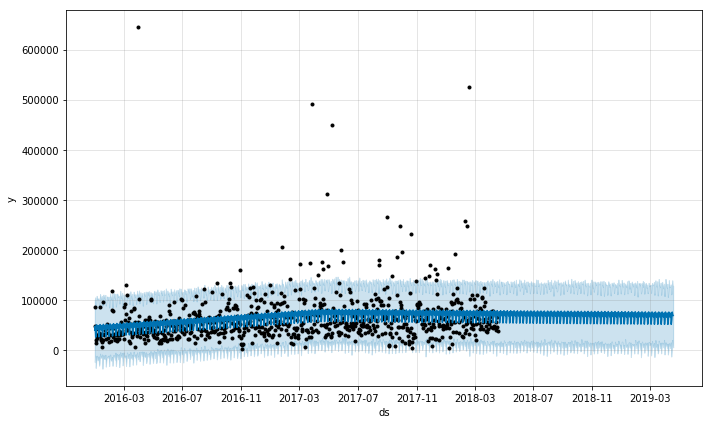

In [32]:
model.plot(forecast);

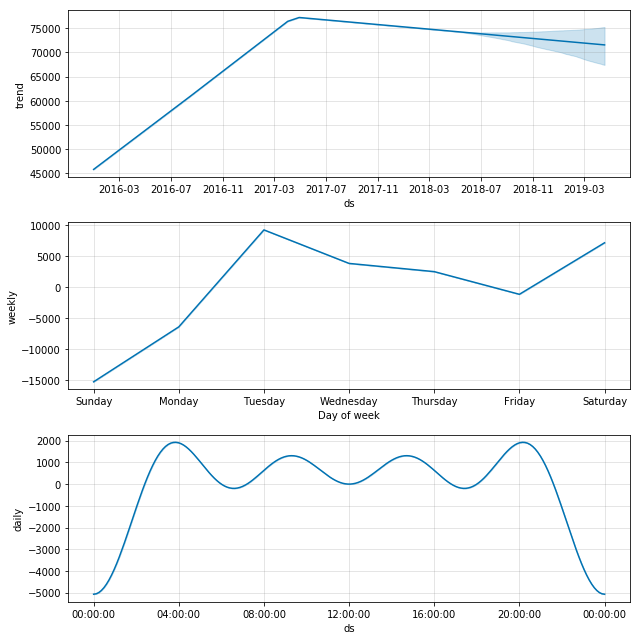

In [42]:
model.plot_components(forecast);